# ENSEMBLE TECHNIQUES ASSIGNMENT

## 1. IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

## 2. READING DATA AS A DATAFRAME

In [2]:
cData = pd.read_csv("bank-full.CSV")

In [3]:
cData.head(10)

age           job   marital  education default  balance housing loan  \
0   58    management   married   tertiary      no     2143     yes   no   
1   44    technician    single  secondary      no       29     yes   no   
2   33  entrepreneur   married  secondary      no        2     yes  yes   
3   47   blue-collar   married    unknown      no     1506     yes   no   
4   33       unknown    single    unknown      no        1      no   no   
5   35    management   married   tertiary      no      231     yes   no   
6   28    management    single   tertiary      no      447     yes  yes   
7   42  entrepreneur  divorced   tertiary     yes        2     yes   no   
8   58       retired   married    primary      no      121     yes   no   
9   43    technician    single  secondary      no      593     yes   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no  
5  unknown    5   may       139         1     -1         0  unknown     no  
6  unknown    5   may       217         1     -1         0  unknown     no  
7  unknown    5   may       380         1     -1         0  unknown     no  
8  unknown    5   may        50         1     -1         0  unknown     no  
9  unknown    5   may        55         1     -1         0  unknown     no

## 3. BASIC EDA

In [4]:
cData.shape #SHAPE OF THE DATA

(45211, 17)

#### THERE ARE 45211 R0WS AND 17 COLUMNS IN THIS DATA SET

In [5]:
cData.info() #DATA TYPE OF EACH ATTRIBUTE

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### THERE ARE 10 DATATYPES WHICH ARE STRING OBJECTS. SO, HAVE TO CONVERT OBJECTS TO CATEGORICAL VARIABLES

In [6]:
cData.describe()   #FIVE POINT SUMMARY

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

#### ONLY NUMERICAL DATATYPE FIVE POINT SUMMARIES ARE SHOWN

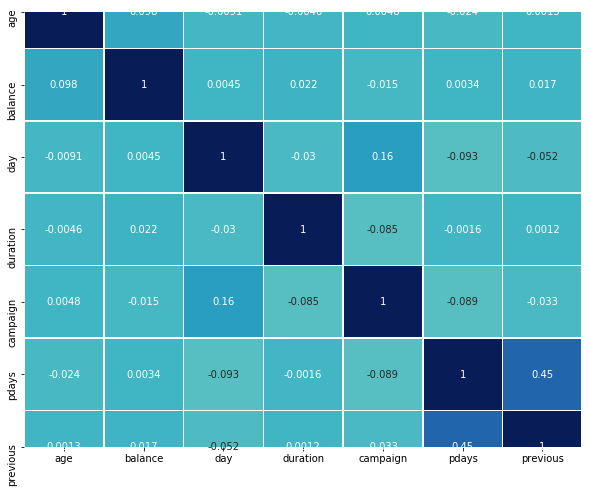

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(cData.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

In [9]:
cData.isnull().values.any() #CHECK FOR MISSING VALUES

False

#### THERE IS NO TRADITIONAL MISSING VALUES. BUT IN THE DATA SET THERE ARE SEVERAL "UNKNOWNS" WHICH SHOULD 

#### BE DESIGNATED DIFFERENTLY WITH -1 BECAUSE THEY DONT CARRY SAME VALUE AS OTHER ATTRIBUTES

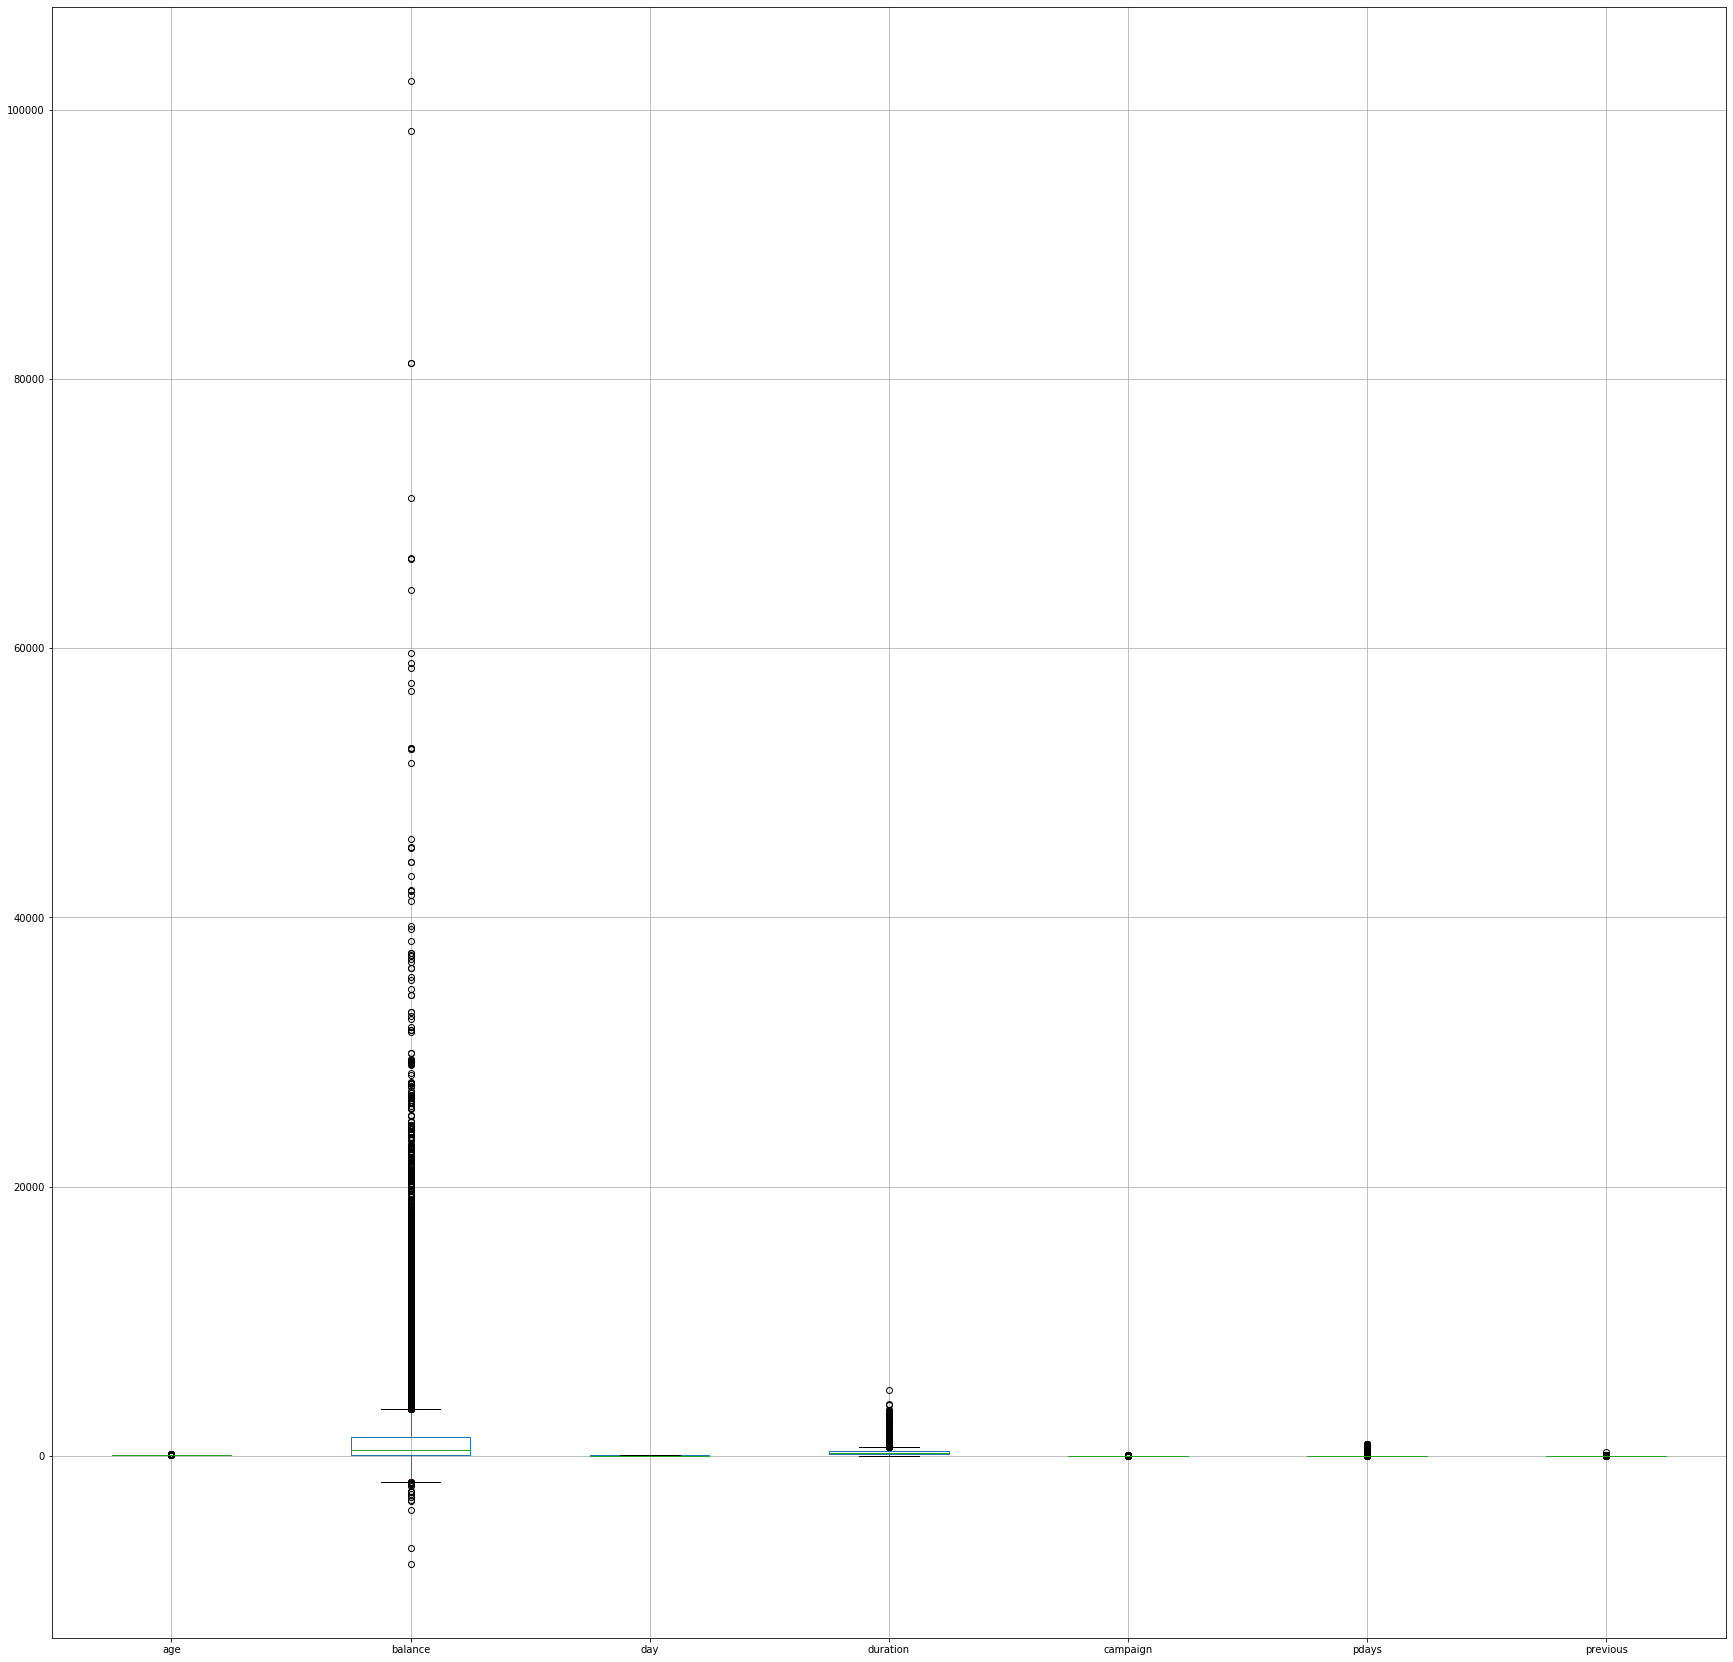

In [10]:
cData.boxplot(
    column=None,
    by=None, figsize=(30,30)) #CHECK FOR OUTLIERS

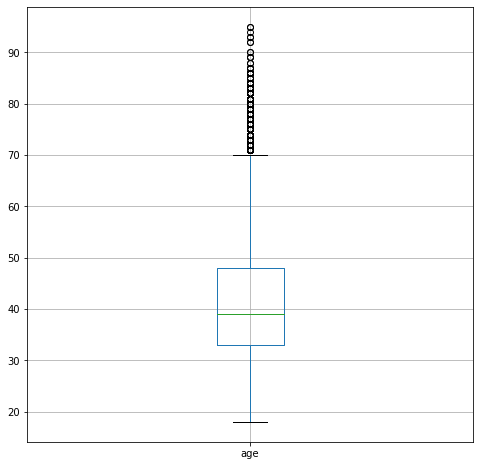

In [11]:
cData.boxplot(['age'],figsize=(8,8))

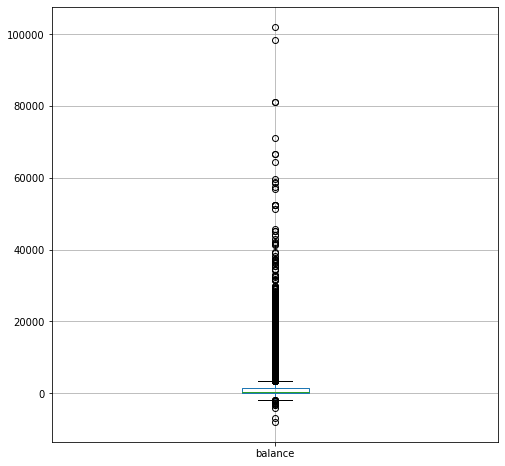

In [12]:
cData.boxplot(['balance'],figsize=(8,8))

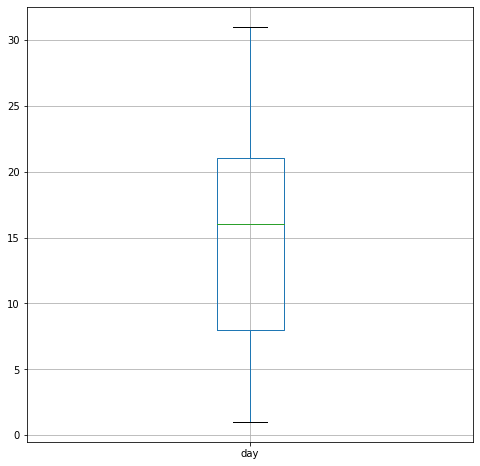

In [13]:
cData.boxplot(['day'],figsize=(8,8))

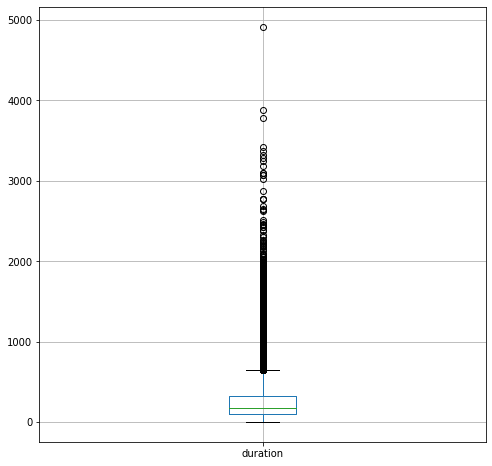

In [14]:
cData.boxplot(['duration'],figsize=(8,8))

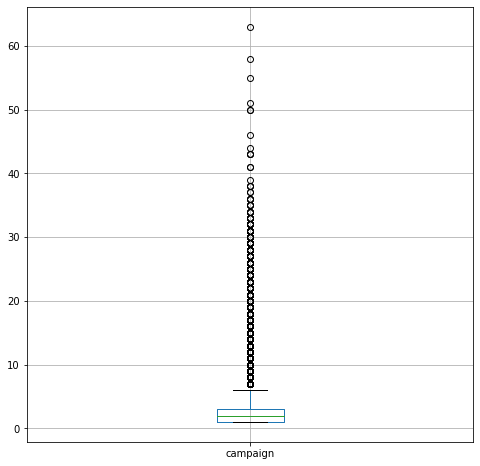

In [15]:
cData.boxplot(['campaign'],figsize=(8,8))

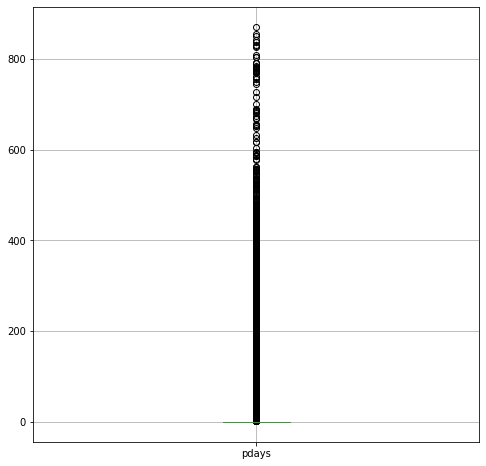

In [16]:
cData.boxplot(['pdays'],figsize=(8,8))

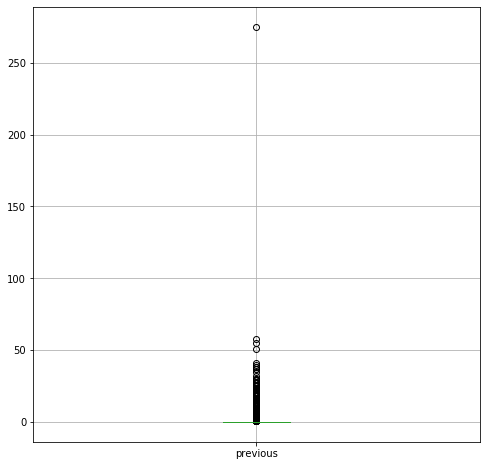

In [17]:
cData.boxplot(['previous'],figsize=(8,8))

#### THERE APPEARS TO BE MORE OUTLIERS IN ALL NUMERICAL ATTRIBUTES EXCEPT DAY. AND OUTLIERS DOESNT 

#### EFFECT MUCH IN CLASSIFICATION MODELS

#### AND IT IS MENTIONED THAT DURATION EFFECTS MORE ON THE TARGET VARIABLE SO, OUTLIERS CAN HAVE EFFECT. PREFEREDLY THT COLUMN CAN BE DROPPED

## 4. PREPARING THE DATA TO TRAIN MODEL

In [18]:
cData.drop(["duration"], axis = 1, inplace = True) #DROPPING DURATION COLUMN

In [19]:
cData.head(10)

age           job   marital  education default  balance housing loan  \
0   58    management   married   tertiary      no     2143     yes   no   
1   44    technician    single  secondary      no       29     yes   no   
2   33  entrepreneur   married  secondary      no        2     yes  yes   
3   47   blue-collar   married    unknown      no     1506     yes   no   
4   33       unknown    single    unknown      no        1      no   no   
5   35    management   married   tertiary      no      231     yes   no   
6   28    management    single   tertiary      no      447     yes  yes   
7   42  entrepreneur  divorced   tertiary     yes        2     yes   no   
8   58       retired   married    primary      no      121     yes   no   
9   43    technician    single  secondary      no      593     yes   no   

   contact  day month  campaign  pdays  previous poutcome Target  
0  unknown    5   may         1     -1         0  unknown     no  
1  unknown    5   may         1     -1         0  unknown     no  
2  unknown    5   may         1     -1         0  unknown     no  
3  unknown    5   may         1     -1         0  unknown     no  
4  unknown    5   may         1     -1         0  unknown     no  
5  unknown    5   may         1     -1         0  unknown     no  
6  unknown    5   may         1     -1         0  unknown     no  
7  unknown    5   may         1     -1         0  unknown     no  
8  unknown    5   may         1     -1         0  unknown     no  
9  unknown    5   may         1     -1         0  unknown     no

In [20]:
for feature in cData.columns: # Loop through all columns in the dataframe
    if cData[feature].dtype == 'object': # Only apply for columns with categorical strings
        cData[feature] = pd.Categorical(cData[feature])
cData.head(10)

age           job   marital  education default  balance housing loan  \
0   58    management   married   tertiary      no     2143     yes   no   
1   44    technician    single  secondary      no       29     yes   no   
2   33  entrepreneur   married  secondary      no        2     yes  yes   
3   47   blue-collar   married    unknown      no     1506     yes   no   
4   33       unknown    single    unknown      no        1      no   no   
5   35    management   married   tertiary      no      231     yes   no   
6   28    management    single   tertiary      no      447     yes  yes   
7   42  entrepreneur  divorced   tertiary     yes        2     yes   no   
8   58       retired   married    primary      no      121     yes   no   
9   43    technician    single  secondary      no      593     yes   no   

   contact  day month  campaign  pdays  previous poutcome Target  
0  unknown    5   may         1     -1         0  unknown     no  
1  unknown    5   may         1     -1         0  unknown     no  
2  unknown    5   may         1     -1         0  unknown     no  
3  unknown    5   may         1     -1         0  unknown     no  
4  unknown    5   may         1     -1         0  unknown     no  
5  unknown    5   may         1     -1         0  unknown     no  
6  unknown    5   may         1     -1         0  unknown     no  
7  unknown    5   may         1     -1         0  unknown     no  
8  unknown    5   may         1     -1         0  unknown     no  
9  unknown    5   may         1     -1         0  unknown     no

In [21]:
print(cData.job.value_counts())
print(cData.marital.value_counts())
print(cData.education.value_counts())
print(cData.default.value_counts())
print(cData.housing.value_counts())
print(cData.loan.value_counts())
print(cData.contact.value_counts())
print(cData.month.value_counts())
print(cData.poutcome.value_counts())
print(cData.Target.value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64
n

In [22]:
replaceStruct = {
                 #"job":  {"admin": 1, "blue-collar": 2 ,"entrepreneur": 3 , "housemaid": 4, "management": 5, "retired": 6, "self-employed":7, "services": 8, "technician": 9, "unemployed": 10,"student": 11, "unknown":-1},
                 "marital":  {"married": 1, "single":2 , "divorced": 3 },
                 "education": {"secondary": 1, "tertiary": 2 , "primary": 3, "unknown": -1},
                 "poutcome":     {"success": 1, "failure": 2 ,"other": 3 ,"unknown": -1 },
                 "housing":     {"no": 0, "yes": 1 },
                 "default":     {"no": 0, "yes": 1 },
                 "loan":     {"no": 0, "yes": 1 },
                 "contact":     {"cellular": 1, "telephone": 2, "unknown": -1 },
                 "target":     {"no": 1, "yes": 2 },
                    }
oneHotCols=["month","job"]


In [23]:
cData=cData.replace(replaceStruct)
cData=pd.get_dummies(cData, columns=oneHotCols)
cData.head(10)


age  marital  education  default  balance  housing  loan  contact  day  \
0   58        1          2        0     2143        1     0       -1    5   
1   44        2          1        0       29        1     0       -1    5   
2   33        1          1        0        2        1     1       -1    5   
3   47        1         -1        0     1506        1     0       -1    5   
4   33        2         -1        0        1        0     0       -1    5   
5   35        1          2        0      231        1     0       -1    5   
6   28        2          2        0      447        1     1       -1    5   
7   42        3          2        1        2        1     0       -1    5   
8   58        1          3        0      121        1     0       -1    5   
9   43        2          1        0      593        1     0       -1    5   

   campaign  ...  job_entrepreneur  job_housemaid  job_management job_retired  \
0         1  ...                 0              0               1           0   
1         1  ...                 0              0               0           0   
2         1  ...                 1              0               0           0   
3         1  ...                 0              0               0           0   
4         1  ...                 0              0               0           0   
5         1  ...                 0              0               1           0   
6         1  ...                 0              0               1           0   
7         1  ...                 1              0               0           0   
8         1  ...                 0              0               0           1   
9         1  ...                 0              0               0           0   

   job_self-employed  job_services  job_student  job_technician  \
0                  0             0            0               0   
1                  0             0            0               1   
2                  0             0            0               0   
3                  0             0            0               0   
4                  0             0            0               0   
5                  0             0            0               0   
6                  0             0            0               0   
7                  0             0            0               0   
8                  0             0            0               0   
9                  0             0            0               1   

   job_unemployed  job_unknown  
0               0            0  
1               0            0  
2               0            0  
3               0            0  
4               0            1  
5               0            0  
6               0            0  
7               0            0  
8               0            0  
9               0            0  

[10 rows x 38 columns]

#### IN THE ABOVE CELLS  I DROPPED DURATION COLUMN AS IT WILL OVERFIT THE DATA.

#### THE OBJECTS HAVE TO BE CHANGED TO CATEGORICAL VALUES AND THE ONE HOT ENCODING IS CHOSEN FOR MONTH AND JOB

#### I DECIDED NOT TO DROP DAY AND MONTH COLUMNS BECAUSE IT MAY HOLD SOME SIGNIFICANCE DUE TO VARIOUS FACTORS LIKE beginning of the month or festival time or psycological factors for some prefered dates ETC..,

#### AND I FOUND OUT ONE HOT ENCODING IS FEASABLE FOR JOB COLUMN BECAUSE I FEEL THERE IS NO PARTICULAR ORDERING TO THE ATTRIBUTES IN IT.

In [24]:
cData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 38 columns):
age                  45211 non-null int64
marital              45211 non-null int64
education            45211 non-null int64
default              45211 non-null int64
balance              45211 non-null int64
housing              45211 non-null int64
loan                 45211 non-null int64
contact              45211 non-null int64
day                  45211 non-null int64
campaign             45211 non-null int64
pdays                45211 non-null int64
previous             45211 non-null int64
poutcome             45211 non-null int64
Target               45211 non-null category
month_apr            45211 non-null uint8
month_aug            45211 non-null uint8
month_dec            45211 non-null uint8
month_feb            45211 non-null uint8
month_jan            45211 non-null uint8
month_jul            45211 non-null uint8
month_jun            45211 non-null uint8
month_

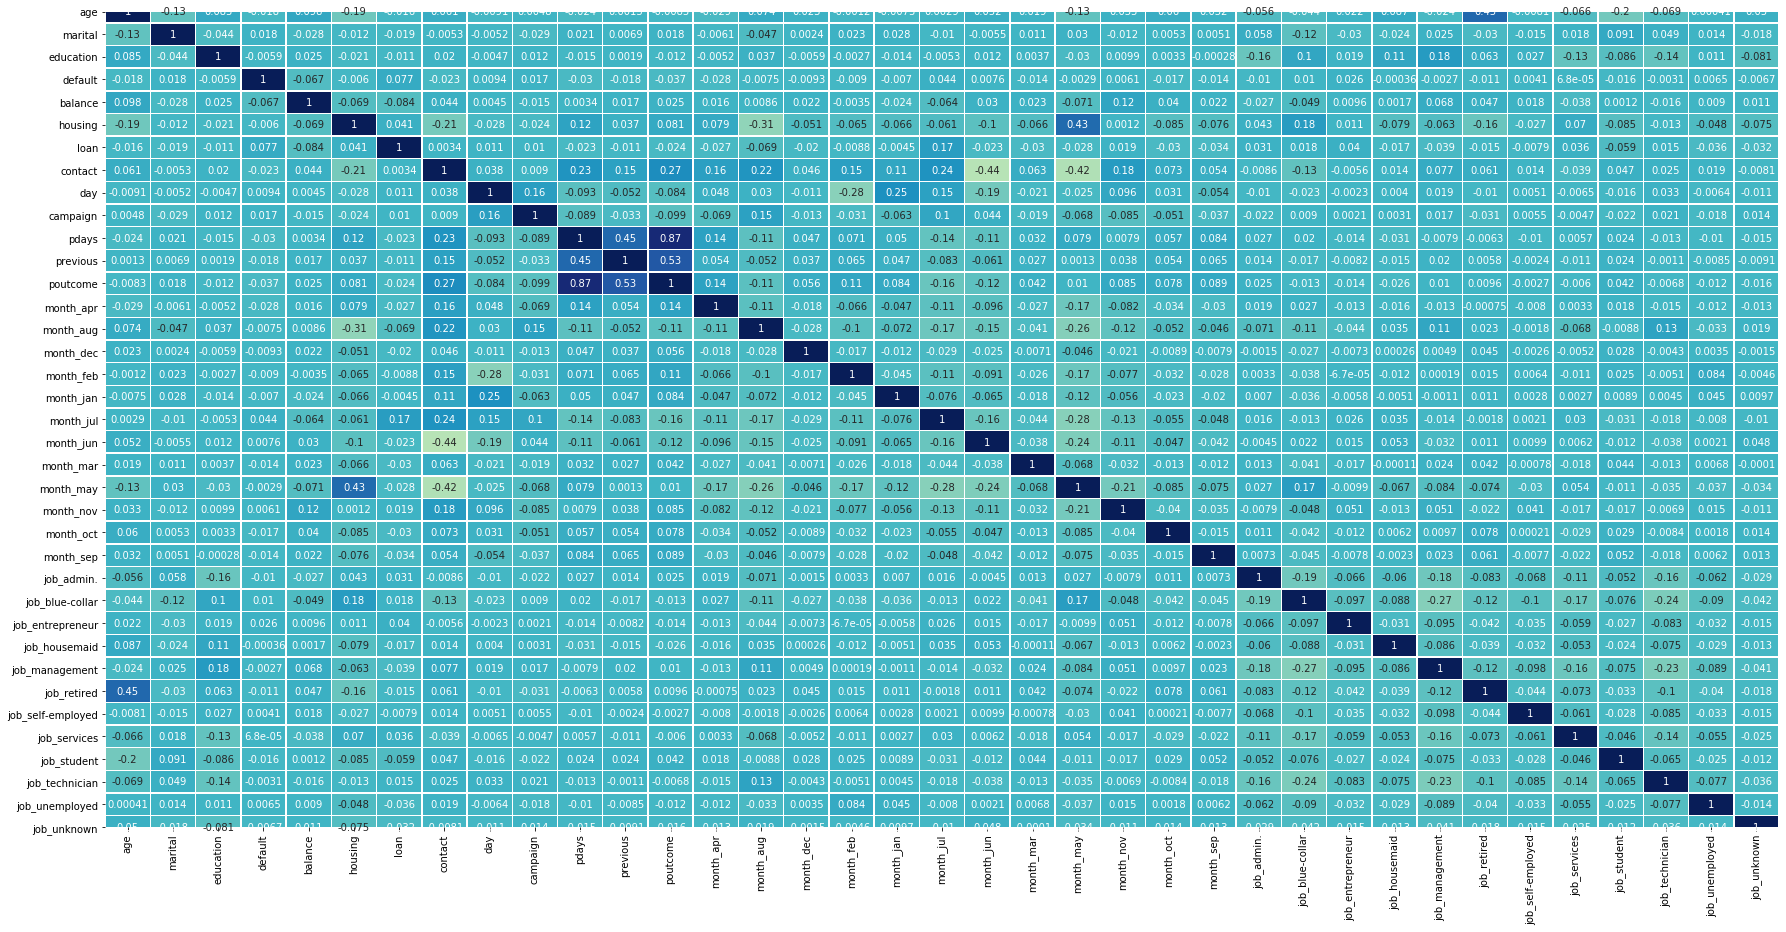

In [25]:
plt.figure(figsize=(30,15))
sns.heatmap(cData.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

### TARGET COLUMN ANALYSIS

In [26]:
cData.groupby(["Target"]).mean()

age   marital  education   default      balance   housing  \
Target                                                                    
no      40.838986  1.502179   1.516382  0.019112  1303.714969  0.581008   
yes     41.670070  1.596710   1.505578  0.009832  1804.267915  0.365854   

            loan   contact        day  campaign  ...  job_entrepreneur  \
Target                                           ...                     
no      0.169330  0.437303  15.892290  2.846350  ...          0.034167   
yes     0.091511  0.873322  15.158253  2.141047  ...          0.023256   

        job_housemaid  job_management  job_retired  job_self-employed  \
Target                                                                  
no           0.028330        0.204323     0.043785           0.034868   
yes          0.020609        0.245982     0.097561           0.035356   

        job_services  job_student  job_technician  job_unemployed  job_unknown  
Target                                                                          
no          0.094810     0.016758        0.169255        0.027579     0.006362  
yes         0.069767     0.050860        0.158820        0.038192     0.006428  

[2 rows x 37 columns]

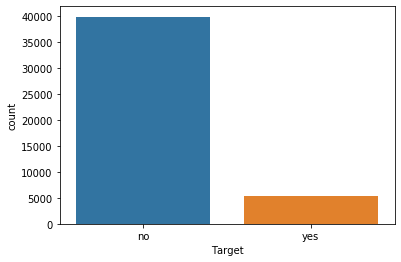

In [27]:
sns.countplot(cData['Target']) # Distribution of target variable 

In [28]:
prop_Y = cData['Target'].value_counts(normalize=True)
print(prop_Y)

no     0.883015
yes    0.116985
Name: Target, dtype: float64


#### FROM THE TARGET COLUMN ANALYSIS ONE CAN CLEARLY SAY THE ONLY 11.7% OF CLIENTS SUBSCRIBED A TERM DEPOSIT IN THE GIVEN DATA

## 5. STANDARD CLASSIFICATION ALGORITHMS

### LOGISTIC REGRESSION

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
#Defining X and Y variables
X = cData.drop('Target', axis=1)
Y = cData[['Target']]

In [31]:
#Spliting into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [32]:
#Building the logistic regression model
logisticRegr = LogisticRegression()

In [33]:
logisticRegr.fit(X_train, y_train)

C:\Users\lokesh duvvuru\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lokesh duvvuru\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
# score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print(score)

0.8861692716012975


In [35]:
#prediction of test data

from sklearn import metrics
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\lokesh duvvuru\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lokesh duvvuru\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
#Predict for train set
pred_train = logreg.predict(X_train)

from sklearn.metrics import classification_report,confusion_matrix
mat_train = confusion_matrix(y_train,pred_train)

print("confusion matrix = \n",mat_train)  #confusion matrix of training set

confusion matrix = 
 [[27603   292]
 [ 3431   321]]


In [37]:
#Predict for test set
pred_test = logreg.predict(X_test)

mat_test = confusion_matrix(y_test,pred_test)
print("confusion matrix = \n",mat_test) #confusion matrix of test set

confusion matrix = 
 [[11904   123]
 [ 1421   116]]


In [38]:
auc_score = metrics.roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
round( float( auc_score ), 2 )

0.74

#### THE ACCURACY RATE OF THE LOGISTIC REGRESSION MODEL IS 88.7%

#### BASED ON AUC SCORE WHICH SAYS THAT 75% OF THE TIMES MODEL PREDICTS CORRECTLY ONE CAN SAY THAT THIS MODEL IS NOT THAT EFFECTIVE TO IMPROVE THE PREDICTION OF THE CLIENT SUBSCRIBING TO TERM DEPOSIT

### NAIVE BAYES

In [39]:
X = cData.drop('Target', axis=1)
Y = cData[['Target']]

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 10)

In [41]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes
clf = GaussianNB()
clf.fit(X_train, Y_train)

C:\Users\lokesh duvvuru\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [42]:
Y_pred = clf.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred, normalize = True)

0.836626363904453

In [44]:
# confusion matrix of train set
pred_train = clf.predict(X_train)
from sklearn.metrics import classification_report,confusion_matrix
mat_train = confusion_matrix(y_train,pred_train)

print("confusion matrix = \n",mat_train) 

confusion matrix = 
 [[23972  3923]
 [ 3251   501]]


In [45]:
#confusion matrix of test data
pred_test = logreg.predict(X_test)
mat_test = confusion_matrix(y_test,pred_test)

print("confusion matrix = \n",mat_test) 

confusion matrix = 
 [[11783   244]
 [ 1509    28]]


#### THE SCORE OF NAIVE BAYES MODEL IS 83.66%  WHICH IS LOWER  COMPARED TO LOGISTIC REGRESSION MODEL

### K-NN MODEL

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [47]:
X = cData.drop('Target', axis=1)
Y = cData[['Target']]

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 10)

In [49]:
# creating odd list of K for KNN
myList = list(range(1,20))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [50]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

C:\Users\lokesh duvvuru\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\Users\lokesh duvvuru\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\Users\lokesh duvvuru\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\Users\lokesh duvvuru\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\Users\lokesh 

The optimal number of neighbors is 15


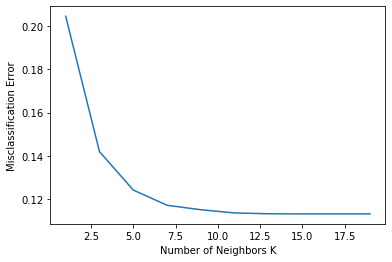

In [51]:
#Plot misclassification error vs k (with k value on X-axis) using matplotlib.
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [52]:
#Use k=15 as the final model for prediction
knn = KNeighborsClassifier(n_neighbors = 15)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))

C:\Users\lokesh duvvuru\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


0.886685343556473


In [53]:
NNH = KNeighborsClassifier(n_neighbors= 7 , weights = 'distance' )
NNH.fit(X_train, y_train)
predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

C:\Users\lokesh duvvuru\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


0.8805662046593925

In [54]:
# confusion matrix of train set
pred_train = knn.predict(X_train)
from sklearn.metrics import classification_report,confusion_matrix
mat_train = confusion_matrix(y_train,pred_train)

print("confusion matrix = \n",mat_train) 

confusion matrix = 
 [[27895     0]
 [ 3752     0]]


In [55]:
#confusion matrix of test data
pred_test = knn.predict(X_test)
mat_test = confusion_matrix(y_test,pred_test)

print("confusion matrix = \n",mat_test) 

confusion matrix = 
 [[12027     0]
 [ 1537     0]]


#### KNN MODEL IS NOT PERFORMING WELL HERE BECAUSE TRUE NEGATIVE RATES ARE ALMOST NONE IN THE CONFUSION MATRIX. IT IS SIDING WITH ONLY TRUE POSITIVE RATES EVEN THOUGH ACCURACY SCORE IS HIGH

### DECISION TREE MODEL

In [56]:
X = cData.drop("Target" , axis=1)
y = cData.pop("Target")

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [58]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)
# BUILDING THE MODEL WITH GINI CRITERIA SPLIT

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [59]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))
# SCORE OF DECISION TREE

1.0
0.8243880861102919


In [60]:
# VISUALIZATION OF DECISION TREE
train_char_label = ['No', 'Yes']
Credit_Tree_File = open('credit_tree.dot','w')
dot_data = tree.export_graphviz(dTree, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
Credit_Tree_File.close()

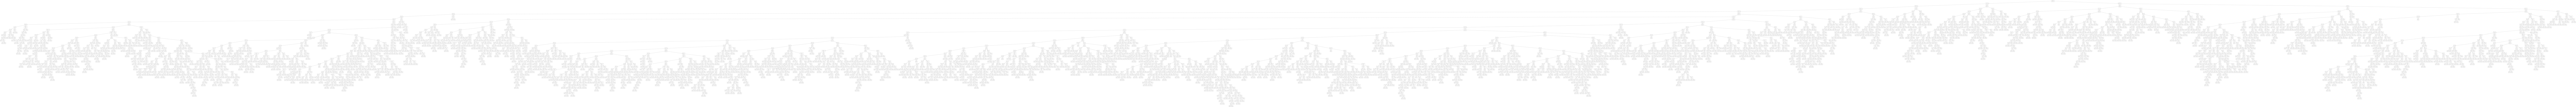

In [61]:
retCode = system("dot -Tpng credit_tree.dot -o credit_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("credit_tree.png"))


In [62]:
# REDUCING OVER FITTING
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.8921224760640819
0.8949424948392805


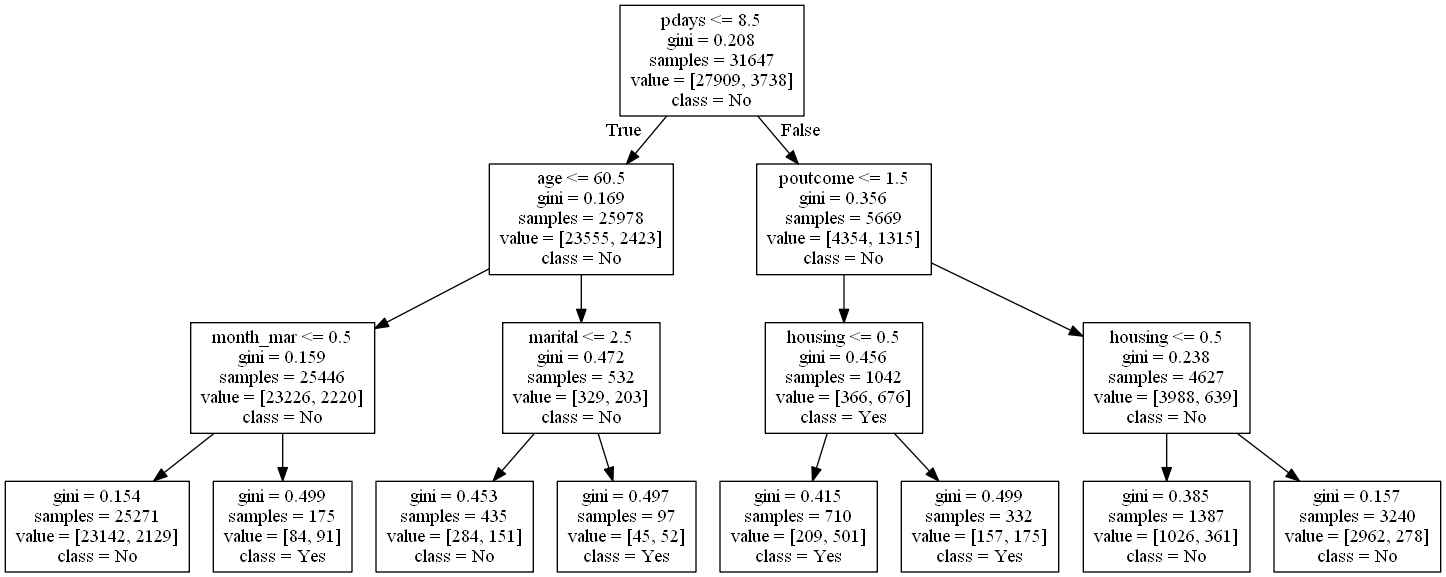

In [63]:
train_char_label = ['No', 'Yes']
Credit_Tree_FileR = open('credit_treeR.dot','w')
dot_data = tree.export_graphviz(dTreeR, out_file=Credit_Tree_FileR, feature_names = list(X_train), class_names = list(train_char_label))
Credit_Tree_FileR.close()

retCode = system("dot -Tpng credit_treeR.dot -o credit_treeR.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("credit_treeR.png"))


In [64]:
print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = X_train.columns))

                        Imp
age                0.105224
marital            0.006600
education          0.000000
default            0.000000
balance            0.000000
housing            0.085714
loan               0.000000
contact            0.000000
day                0.000000
campaign           0.000000
pdays              0.208636
previous           0.000000
poutcome           0.516908
month_apr          0.000000
month_aug          0.000000
month_dec          0.000000
month_feb          0.000000
month_jan          0.000000
month_jul          0.000000
month_jun          0.000000
month_mar          0.076918
month_may          0.000000
month_nov          0.000000
month_oct          0.000000
month_sep          0.000000
job_admin.         0.000000
job_blue-collar    0.000000
job_entrepreneur   0.000000
job_housemaid      0.000000
job_management     0.000000
job_retired        0.000000
job_self-employed  0.000000
job_services       0.000000
job_student        0.000000
job_technician     0

In [65]:
print(dTreeR.score(X_test , y_test))

0.8949424948392805


In [66]:
y_predict = dTreeR.predict(X_test)

mat_test = confusion_matrix(y_test,y_predict)

print("confusion matrix = \n",mat_test) 

confusion matrix = 
 [[11786   227]
 [ 1198   353]]


#### DECISION TREE MODEL PREDICTS 89.2 AND 89.5 TIMES OUT OF 100 TIMES IN TRAIN AND TEST DATA RESPECTIVELY 

#### BASED ON THAT THIS MODEL IS MORE RELIABLE FOR PREDICTION OF A CLIENT BUYING TERM DEPOSIT THAN ABOVE BASE MODELS

## 6. ENSEMBLE MODELS

### BAGGING

In [67]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)


In [68]:
print(bgcl.score(X_test , y_test))

0.8912562665880271


In [69]:
y_predict = bgcl.predict(X_test)

mat_test = confusion_matrix(y_test,y_predict)

print("confusion matrix = \n",mat_test) 

confusion matrix = 
 [[11690   323]
 [ 1152   399]]


#### WHEN THE BAGGING IS USED FOR DECISION TREE CLASSIFIER THE SCORE REDUCES SLIGHTLY FROM 89.49 TO 89.12

#### SO THE DECISION TREE CLASSIFIER PERFORMS BETTER

In [70]:
lr = LogisticRegression()
bgcl = BaggingClassifier(base_estimator=lr, n_estimators=50,random_state=1)
# base estimator linear regression
bgcl = bgcl.fit(X_train, y_train)

C:\Users\lokesh duvvuru\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lokesh duvvuru\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lokesh duvvuru\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lokesh duvvuru\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lokesh duvvuru\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to '

C:\Users\lokesh duvvuru\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lokesh duvvuru\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lokesh duvvuru\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lokesh duvvuru\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lokesh duvvuru\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to '

In [71]:
print(bgcl.score(X_test , y_test))

0.8852845768209967


In [72]:
y_predict = bgcl.predict(X_test)

mat_test = confusion_matrix(y_test,y_predict)

print("confusion matrix = \n",mat_test) 

confusion matrix = 
 [[11889   124]
 [ 1432   119]]


#### BASE MODEL PERFORMS ALMOST THE SAME AS THE ENSEMBLE MODEL OF LOGISTIC REGRESSION USING BAGGING

In [73]:
gnb = GaussianNB()
bgcl = BaggingClassifier(base_estimator=gnb, n_estimators=50,random_state=1)
#base estimator gaussian naive bayes

bgcl = bgcl.fit(X_train, y_train)


In [74]:
print(bgcl.score(X_test , y_test))

0.8314656443526983


In [75]:
y_predict = bgcl.predict(X_test)

mat_test = confusion_matrix(y_test,y_predict)

print("confusion matrix = \n",mat_test) 

confusion matrix = 
 [[10688  1325]
 [  961   590]]


#### BASE MODEL OF NAIVE BAYES PERFORMS SLIGHTLY BETTER THAN ENSEMBLE BAGGING CLASSIFIER MODEL

In [76]:
kNN = KNeighborsClassifier() # base estimator k nearest neighbor
bgcl = BaggingClassifier(base_estimator=kNN, n_estimators=50,random_state=1)
bgcl = bgcl.fit(X_train, y_train)

In [77]:
print(bgcl.score(X_test , y_test))

0.8801975818342672


In [78]:
y_predict = bgcl.predict(X_test)

mat_test = confusion_matrix(y_test,y_predict)

print("confusion matrix = \n",mat_test) 

confusion matrix = 
 [[11762   251]
 [ 1374   177]]


#### KNN  USING BAGGING PERFORMS BETTER THAN BASE KNN MODEL

### IN THE ABOVE ENSEMBLE BAGGING MODELS THE ONE WITH BASE ESTIMATOR AS "DECISION TREE" PERFORMS WELL WITH 89% SCORE

### ADA BOOSTING

In [79]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=50, random_state=1)
# BASE ESTIMATOR IS DECISION TREE
abcl = abcl.fit(X_train, y_train)

In [80]:
print(abcl.score(X_test , y_test))

0.8919935122382778


In [81]:
y_predict = abcl.predict(X_test)

mat_test = confusion_matrix(y_test,y_predict)

print("confusion matrix = \n",mat_test) 

confusion matrix = 
 [[11828   185]
 [ 1280   271]]


#### ADA BOOSTING WITH DECISION TREE PERFORMS BETTER THAN BAGGING MODEL

#### BUT STILL DECISION TREE BASE MODEL PERFORMS WELL

In [82]:
abcl = AdaBoostClassifier(base_estimator=lr, n_estimators=10, random_state=1)
# BASE ESTIMATOR IS LOGISTIC REGRESSION
abcl = abcl.fit(X_train, y_train)

C:\Users\lokesh duvvuru\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lokesh duvvuru\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lokesh duvvuru\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lokesh duvvuru\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lokesh duvvuru\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to '

In [83]:
print(abcl.score(X_test , y_test))

0.8851371276909467


In [84]:
y_predict = abcl.predict(X_test)

mat_test = confusion_matrix(y_test,y_predict)

print("confusion matrix = \n",mat_test) 

confusion matrix = 
 [[12002    11]
 [ 1547     4]]


#### BOTH ENSEMBLE MODELS WITH BAGGING AND ADA BOOSTING PERFORMS ALMOST SAME AS THE BASE LOGISTIC REGRESSION MODEL

In [85]:
abcl = AdaBoostClassifier(base_estimator=gnb, n_estimators=10, random_state=1)
# BASE ESTIMATOR IS GAUSSIAN NAIVE BAYES
abcl = abcl.fit(X_train, y_train)

In [86]:
print(abcl.score(X_test , y_test))

0.8547626069006193


In [87]:
y_predict = abcl.predict(X_test)

mat_test = confusion_matrix(y_test,y_predict)

print("confusion matrix = \n",mat_test) 

confusion matrix = 
 [[11527   486]
 [ 1484    67]]


#### STANDARD NAIVE BAYES MODEL PERFORMS  BETTER THAN ADA BOOTING MODEL WHEN N-ESTIMATORS ARE 50

#### BUT WHEN N-ESTIMARORS ARE 10 ADA BOOSTING OF NAIVE BAYES PERFORMS BETTER

### IN ABOVE ENSEMBLE ADA BOOSTING MODELS THE ONE WITH THE BASE ESTIMATOR AS DECISION TREE PERFORMS BETTER FOR PREDICTIONS WITH SCORE OF 89.2%

### GRADIENT BOOSTING

In [88]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [89]:
print(gbcl.score(X_test, y_test))

0.8939840754939545


In [90]:
y_predict = gbcl.predict(X_test)

mat_test = confusion_matrix(y_test,y_predict)

print("confusion matrix = \n",mat_test) 

confusion matrix = 
 [[11888   125]
 [ 1313   238]]


#### ENSEMBLE GRADIENT BOOSTING MODEL GIVES SCORE OF 89.4 PERCENT WHICH IS NOT BAD

#### BUT DECISION TREE CLASSIFIER IS SLIGHTLY BETTER

### RANDOM FOREST CLASSIFIER

In [91]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)

In [92]:
print(rfcl.score(X_test, y_test))

0.892288410498378


In [93]:
y_predict = rfcl.predict(X_test)

mat_test = confusion_matrix(y_test,y_predict)

print("confusion matrix = \n",mat_test) 

confusion matrix = 
 [[11716   297]
 [ 1164   387]]


#### DECISION TREE CLASSIFIER SEEMS TO PERFORM SLIGHTLY BETTER THAN RANDOM FOREST CLASSIFIER

## 7. COMPARING PERFORMANCE OF ALL MODELS

### 1- when comparing all logistic regression models, they all seem to perform almost same, but auc score seems low for base model.

### 2- when comparing all naive bayes models, Ada boosting model of gaussian naive bayes with n_estimators of 10 seems to perform better.

### 3- when comparing base knn model and bagging knn model, knn model using bagging performs slightly better.

### 4- when comparing all the models of decision tree classifier, base decision tree classifier model performs better.

## CONCLUSION: Standard Decision tree classifier is the best model to predict if the client will subscribe to a term deposit. gradient boosting of decion tree and random forest classifier comes close but due to their computation time( which is greater than base model) one cant afford it unless they perform better than base model. 